In [1]:
# digit_recognition.py

import numpy as np
from skimage.transform import resize
from skimage.color import rgb2gray, rgba2rgb
from joblib import load
from skimage import img_as_ubyte
import skimage.io as io
import matplotlib.pyplot as plt
import glob

# Load the pre-trained model
model = load('digit_predictor.joblib')

In [2]:
def preprocess_image(image_path):
    """
    Function to load an image, convert to grayscale, resize it to 28x28,
    flatten it and prepare it for the model.
    """
    # Load the image
    image = io.imread(image_path)
    # Convert to grayscale if it's a colored image
    if image.ndim == 3:
        if (image.shape[2]==3):
            image = rgb2gray(image)
        if (image.shape[2]==4):
            image = rgb2gray(rgba2rgb(image))
    
    # Resize the image to 28x28 pixels
    resized_image = resize(image, (28, 28), anti_aliasing=True)
    resized_image = img_as_ubyte(resized_image)
    
    # plt.imshow(resized_image)
    # plt.colorbar()
    # plt.show()
    # Flatten the image to a 1D array (28*28 = 784)
    flat_image = resized_image.flatten()
    
    return flat_image

def predict_digit(image_path):
    """
    Function to predict the digit in the image using the pre-trained model.
    """
    # Preprocess the image
    flat_image = preprocess_image(image_path)
    
    # Reshape the flat image to match the model's expected input
    flat_image = flat_image.reshape(1, -1)
    
    # Use the loaded model to predict the digit
    prediction = model.predict(flat_image)
    
    return prediction[0]

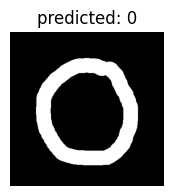

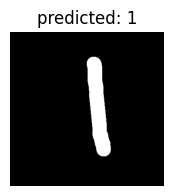

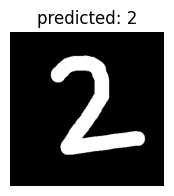

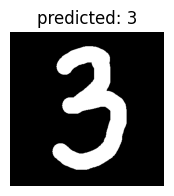

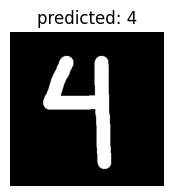

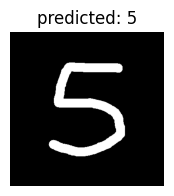

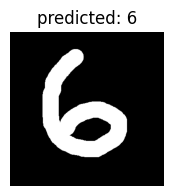

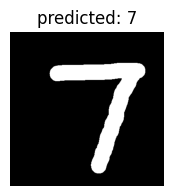

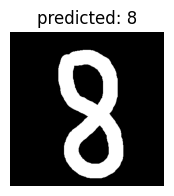

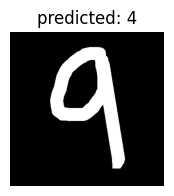

In [4]:
# Example usage:

files = glob.glob("D:\\temporary backup\\Codes\\Machine Learning\\learn from Harry\\digit*.bmp")
# image_path = "D:\\temporary backup\\Codes\\Machine Learning\\learn from Harry\\digit_1.bmp"  # Replace with your actual image path

for image_path in files:
    predicted_digit = predict_digit(image_path)
    plt.figure(figsize=(3,2))
    plt.imshow(io.imread(image_path))
    plt.axis("off")
    plt.title(f"predicted: {predicted_digit}")
    # print(f"The predicted digit is: {predicted_digit}")